In [59]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from scipy.ndimage import gaussian_filter1d
from pandas import DataFrame, Series
import matplotlib.pylab as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import datetime
from pyproj import CRS, Transformer
import os
import io

%matplotlib inline
np.set_printoptions(precision=3 , suppress= True)

In [167]:
#initial parameters - path
folder_path = '/Users/rafaelaoliveira/aware/IDIL internship/time series/InSAR time-series'
file_path = os.path.join(folder_path, 'EGMS_L3_E44N25_100km_E.csv')
teste = pd.read_csv(file_path)

teste_reduced = teste.iloc[:,list(range(1, 4)) + list(range(11, 150))]
print(teste_reduced)

        easting  northing  height  20160105  20160111  20160117  20160123  \
0       4499150   2596450  2186.4       3.2       5.8       3.2       1.6   
1       4499350   2596550  2060.1       8.4       6.5       6.2       4.6   
2       4499150   2596550  2112.4      -1.0      -0.8      -2.5      -3.2   
3       4498950   2596550  2075.7       1.7       0.9       0.3      -1.1   
4       4498850   2596550  2024.0       1.1       1.5       2.7       0.8   
...         ...       ...     ...       ...       ...       ...       ...   
209839  4415850   2516650   565.8      -0.9      -0.2      -0.1      -0.8   
209840  4415950   2516650   563.0      -0.0      -0.4      -0.4      -0.4   
209841  4416050   2516650   551.3      -1.2      -0.6      -0.4       2.4   
209842  4416150   2516650   537.0       2.0      -0.3      -1.1      -2.4   
209843  4416250   2516750   535.2      -1.0       0.2       0.5      -1.1   

        20160129  20160204  20160210  ...  20180217  20180223  20180301  \


In [141]:
#define the ETRS89-LAEA and the UTM projection
etrs89_laea = pyproj.CRS("EPSG:3035")
wgs84 = pyproj.CRS("EPSG:4326")
utm_32 = pyproj.CRS("EPSG:23032")

In [161]:
teste_new = teste_reduced.copy()

transformer = pyproj.Transformer.from_crs(etrs89_laea, wgs84)
teste_new["latitude"], teste_new["longitude"] = transformer.transform(teste_new["northing"].to_numpy(), teste_new["easting"].to_numpy())

print(teste_new)

        easting  northing  height  20180106  20180112  20180118  20180124  \
0       4477450   2500050    23.9      -1.2      -0.7      -0.1      -0.3   
1       4477250   2500050    23.3       0.1       1.0       1.7       1.6   
2       4478650   2500050    24.8       3.4      -2.0      -0.2      -3.6   
3       4478150   2500050    22.9      -1.0      -0.1      -0.2      -1.4   
4       4478450   2500050    25.0       0.6      -0.0       0.4       0.6   
...         ...       ...     ...       ...       ...       ...       ...   
226662  4420750   2599950   325.0      -2.0       3.7       2.6       1.5   
226663  4422050   2599950   491.0      -0.7       0.9      -0.7       1.0   
226664  4421350   2599950   355.0      -4.5      -1.7      -1.3       2.6   
226665  4421750   2599950   450.0       4.5       1.0       1.3       2.7   
226666  4421950   2599950   463.2      -0.3       1.5       2.7       2.6   

        20180130  20180205  20180211  ...  20200302  20200308  20200314  \


In [100]:
#teste_new = teste_reduced.copy()

#transformer = pyproj.Transformer.from_crs(etrs89_laea, utm_32)

#for index, row in teste_reduced.iterrows():
 #   northing, easting = row["northing"], row["easting"] 
 #   longitude, latitude = transformer.transform(northing, easting)
 #   teste_new.at[index, "longitude"] = longitude
 #   teste_new.at[index, "latitude"] = latitude

#print(teste_new)

In [162]:
latitude_min = 46.099
latitude_max = 46.101
longitude_min = 12.084
longitude_max = 12.086

teste_area_selected = teste_new[((teste_new['latitude'] > latitude_min) & (teste_new['latitude'] < latitude_max) &
                  (teste_new['longitude'] > longitude_min) & (teste_new['longitude'] < longitude_max))]

print(teste_area_selected)

       easting  northing  height  20180106  20180112  20180118  20180124  \
75476  4482350   2556350   317.3       0.2       0.3      -0.6      -1.4   
75478  4482450   2556350   306.1       0.5       0.4       0.2       0.1   
75479  4482450   2556450   309.8       2.5       0.9       0.3       0.7   
75480  4482350   2556450   328.3       0.5      -1.0       0.2      -1.3   

       20180130  20180205  20180211  ...  20200302  20200308  20200314  \
75476      -0.5       0.2      -0.6  ...      -3.3      -4.2      -3.7   
75478       1.0      -0.3       0.1  ...      -3.7      -2.2      -2.8   
75479       0.1      -1.6      -0.6  ...      -1.5      -0.5      -1.1   
75480       1.2      -0.0       0.2  ...      -3.4      -1.9      -2.3   

       20200320  20200326  20200401  20200407  20200413   latitude  longitude  
75476      -4.6      -3.4      -3.8      -4.2      -4.6  46.099810  12.084457  
75478      -2.9      -1.8      -2.7      -3.1      -2.8  46.099784  12.085748  
75479   

In [163]:
teste_point = teste_area_selected.iloc[3, 3:142]
print(teste_point)

20180106    0.5
20180112   -1.0
20180118    0.2
20180124   -1.3
20180130    1.2
           ... 
20200320   -2.4
20200326   -0.8
20200401   -0.3
20200407   -0.2
20200413   -1.7
Name: 75480, Length: 139, dtype: float64


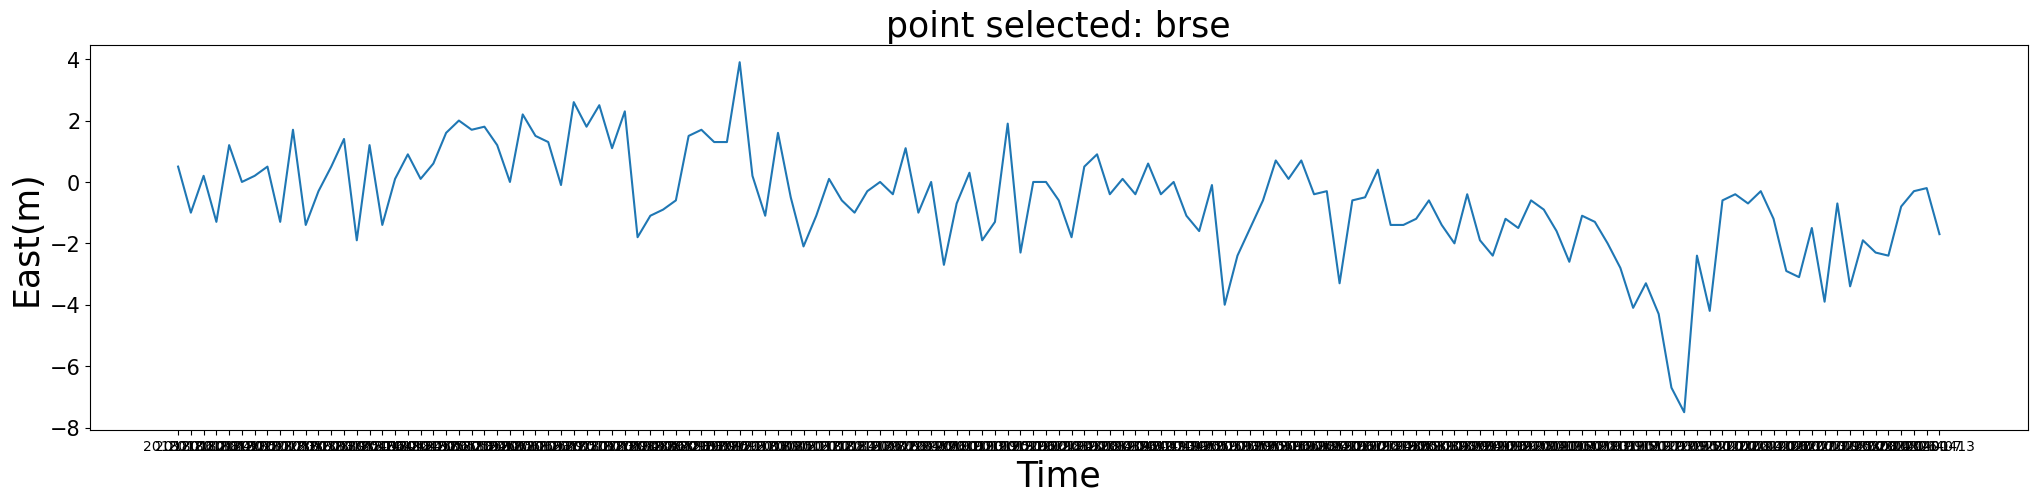

In [166]:
plt.figure(figsize=(25, 5))
    
plt.plot(teste_point.index, teste_point)
plt.title('point selected: brse', fontsize = 25)
plt.xlabel('Time', fontsize = 25)
#plt.xticks(fontsize=15)
plt.ylabel('East(m)', fontsize = 25)
plt.yticks(fontsize=15)

folder = '/home/rafaela/internship/time_series/Time-Series-Analysis/insar-time-series/insar_images'
fl = os.path.join(folder, 'insar_timeserie_brse_station.svg')
#plt.savefig(fl, format="svg")

plt.show()